In [13]:
# Load packages
import os
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
from tqdm import tqdm

# Advanced plotting functionality with seaborn
import seaborn as sns
#import folium  #needed for interactive map
#from folium.plugins import HeatMap
#from folium.plugins import FastMarkerCluster

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

!pip install tqdm

# Importing dataset and other useful definitions

In [4]:
df = pd.read_csv('final_dataset_categoried.csv').drop(['Unnamed: 0'], axis=1)

In [5]:
df.head(5)

,Density,PercLatino,BachelorsRate,HousingUnits,TotalPop,Pop,PercAsian,PercBlack,MeanHHIncome,UnempRate,MedianHHIncome,AREA_WEIGHTED_RISK,PercWhite,ZipArea,count,minmax_count,minmax_content_amount,labels,totalContentsInsuranceCoverage
0,6333.722287,0.152896,9100.0,18910,38876,37996,0.027832,0.131598,71218.0,0.043845,51132.0,0.646319,0.787221,5.999,897.695488,0.516220,0.554188,4,215159400.0
1,5864.864865,0.170330,6504.0,9243,20748,18879,0.068874,0.127771,88894.0,0.063429,56786.0,0.513518,0.756940,3.219,1257.887442,0.723348,0.576048,4,212752400.0
2,5720.188061,0.151738,9036.0,17085,41084,40150,0.041087,0.121945,74662.0,0.046281,58624.0,0.674042,0.801894,7.019,1174.139468,0.675189,0.766426,4,298825800.0
3,5818.551279,0.111746,9197.0,12514,25200,24339,0.025437,0.027302,105106.0,0.040639,62982.0,0.585405,0.904881,4.183,1105.524743,0.635732,0.557463,4,235310300.0
4,6065.276168,0.226628,4055.0,6536,16344,15703,0.059288,0.092450,86943.0,0.042713,63695.0,0.639270,0.794787,2.589,1738.979694,1.000000,0.500628,4,183343200.0


In [6]:
final_columns=['Density',
   'MeanHHIncome',
   'BachelorsRate',
   'PercLatino',
   'HousingUnits',
   'TotalPop',
   'Pop',
   'PercAsian',
   'PercBlack',
   'UnempRate',
   'MedianHHIncome',
   'AREA_WEIGHTED_RISK',
   'PercWhite',
   'ZipArea']
targets = ['count', 'minmax_count', 'minmax_content_amount', 'labels', 'totalContentsInsuranceCoverage']

In [7]:
# display risk
def to_risk(risk):
    if risk == 0: return "low"
    if risk == 1: return "low-moderate"
    if risk == 2: return "moderate"
    if risk == 3: return "moderate-high"
    else: return "high"

In [8]:
X = df[final_columns]
y_count = df['count']
y_amount = df['totalContentsInsuranceCoverage']
y_minmax_count = df['minmax_count']
y_minmax_amount = df['minmax_content_amount']
y_labels = df['labels']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y_labels)

# Clustering Algorithms (k-means, k-NN)

## k-nearest neighbors

In [10]:
k = 10 #K-nearest — hyperparameter
perf = dict()
for k in range(1, len(df) // 5):
    clf = neighbors.KNeighborsClassifier(k, weights='distance', algorithm='ball_tree') #'auto', 'ball_tree', 'kd_tree', 'brute'
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    report = classification_report(y_test, y_pred)
    perf[k] = [float(i) for i in report.split('\n')[-2].split()[2:5]]

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/p

In [11]:
ordered_knn_params = sorted(perf.items(), key=lambda r: 1 - r[1][0])
ordered_knn_params

[(29, [0.57, 0.55, 0.49]),
 (28, [0.55, 0.53, 0.46]),
 (4, [0.51, 0.54, 0.51]),
 (10, [0.51, 0.55, 0.51]),
 (25, [0.51, 0.55, 0.49]),
 (9, [0.5, 0.54, 0.5]),
 (11, [0.5, 0.54, 0.5]),
 (12, [0.5, 0.54, 0.5]),
 (15, [0.5, 0.54, 0.5]),
 (26, [0.5, 0.54, 0.48]),
 (6, [0.49, 0.53, 0.49]),
 (13, [0.49, 0.53, 0.49]),
 (14, [0.49, 0.53, 0.49]),
 (20, [0.49, 0.54, 0.48]),
 (21, [0.49, 0.53, 0.47]),
 (27, [0.49, 0.53, 0.47]),
 (24, [0.48, 0.53, 0.46]),
 (19, [0.47, 0.53, 0.48]),
 (22, [0.47, 0.53, 0.47]),
 (23, [0.47, 0.52, 0.46]),
 (5, [0.46, 0.52, 0.47]),
 (8, [0.46, 0.51, 0.46]),
 (16, [0.46, 0.52, 0.47]),
 (33, [0.46, 0.54, 0.47]),
 (7, [0.45, 0.51, 0.46]),
 (17, [0.45, 0.52, 0.46]),
 (18, [0.45, 0.53, 0.47]),
 (34, [0.45, 0.53, 0.46]),
 (31, [0.44, 0.54, 0.47]),
 (35, [0.44, 0.53, 0.46]),
 (36, [0.44, 0.53, 0.46]),
 (37, [0.44, 0.54, 0.47]),
 (3, [0.43, 0.46, 0.44]),
 (32, [0.43, 0.53, 0.45]),
 (38, [0.42, 0.53, 0.44]),
 (30, [0.41, 0.53, 0.45]),
 (39, [0.41, 0.52, 0.43]),
 (1, [0.39, 0.42,

In [14]:
clf = neighbors.KNeighborsClassifier(29, weights='distance', algorithm='ball_tree') #'auto', 'ball_tree', 'kd_tree', 'brute'
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.92      0.71        52
           1       0.47      0.38      0.42        37
           2       1.00      0.07      0.12        15
           3       0.00      0.00      0.00         3
           4       0.50      0.18      0.27        11

   micro avg       0.55      0.55      0.55       118
   macro avg       0.51      0.31      0.30       118
weighted avg       0.57      0.55      0.49       118



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


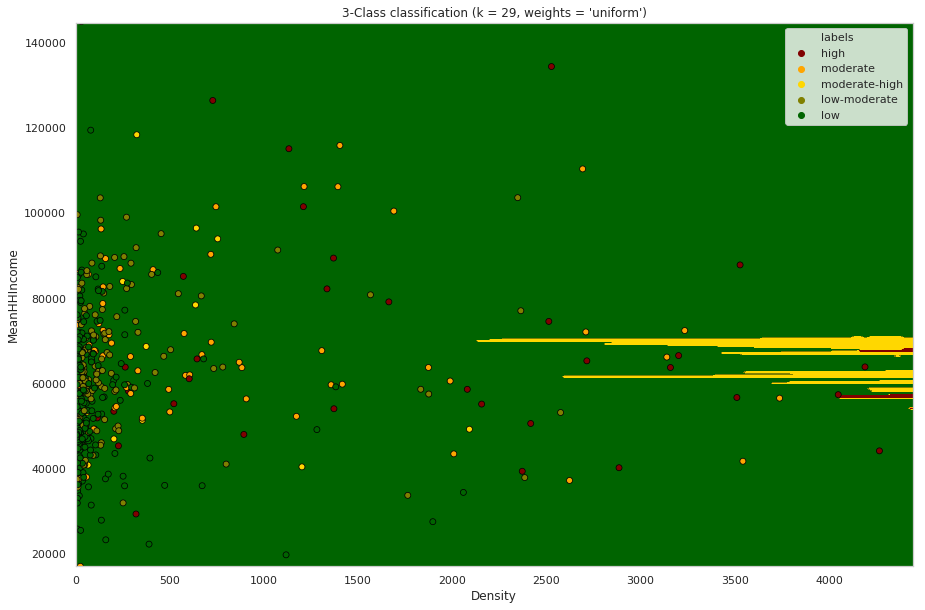

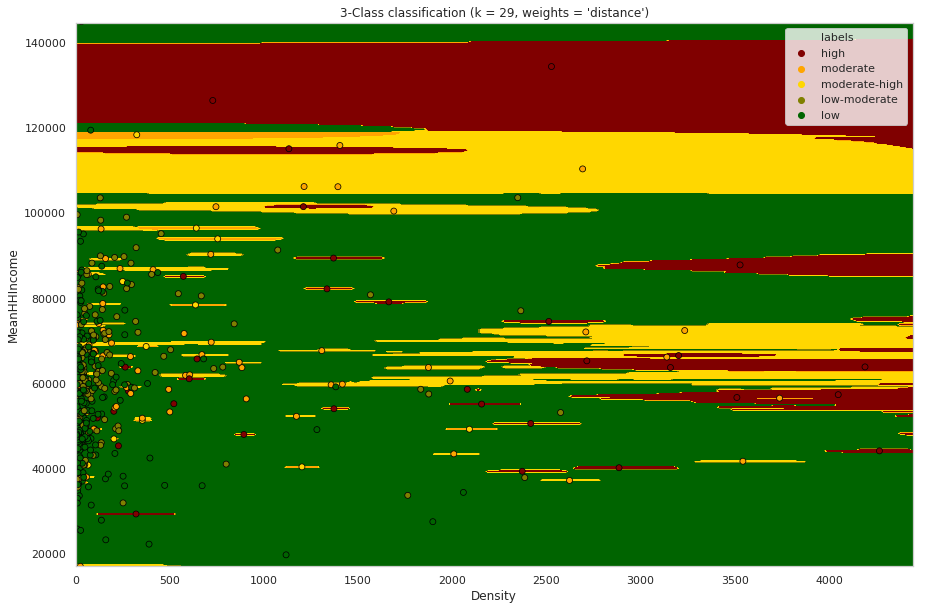

In [12]:
# seems that some k's works better than others. let's plot some results in 2D.
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
cmap_light = ListedColormap(['darkgreen', 'olive', 'gold', 'orange', 'maroon'])
cmap_bold = ['maroon', 'orange', 'gold', 'olive', 'darkgreen']#['green', 'lightgreen', 'yellow', 'coral', 'red']
weights = 'distance'
width = 500 #mesh step size
optimal_k = ordered_knn_params[0][0]

for weights in ['uniform', 'distance']:

    clf = neighbors.KNeighborsClassifier(optimal_k, weights=weights, algorithm='ball_tree') #'auto', 'ball_tree', 'kd_tree', 'brute'
    x_2d = X.values[:, :2]
    clf.fit(x_2d, y_labels)

    x_min, x_max = x_2d[:, 0].min() - 1, x_2d[:, 0].max() + 1
    y_min, y_max = x_2d[:, 1].min() - 1, x_2d[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / width),
                         np.arange(y_min, y_max, (y_max - y_min) / width))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(15, 10))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=x_2d[:, 0], y=x_2d[:, 1], hue=y_labels.apply(to_risk),
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max()/2)
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {optimal_k}, weights = '{weights}')")
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

It's clear that we're losing a lot of information from using a uniform weighting (plurality vote system), so our optimal kNN approach can be shown using density.

## k-means

In [ ]:
# come back 

# Artificial Neural Nets (ANN)